# sleepDay_merged Dataset

Exploring & Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = '/University/6th Semester/Sixth Semester/IDS-AIProject/FitabaseData4.12.16-5.12.16/sleepDay_merged.csv'
df_sleep_day = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df_sleep_day.head())


           Id               SleepDay  TotalSleepRecords  TotalMinutesAsleep  \
0  1503960366  4/12/2016 12:00:00 AM                  1                 327   
1  1503960366  4/13/2016 12:00:00 AM                  2                 384   
2  1503960366  4/15/2016 12:00:00 AM                  1                 412   
3  1503960366  4/16/2016 12:00:00 AM                  2                 340   
4  1503960366  4/17/2016 12:00:00 AM                  1                 700   

   TotalTimeInBed  
0             346  
1             407  
2             442  
3             367  
4             712  


In [2]:
# Check for missing values
print(df_sleep_day.isnull().sum())

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64


In [3]:
# Check data types
print(df_sleep_day.dtypes)

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object


In [4]:
# Descriptive statistics
print(df_sleep_day.describe())

                 Id  TotalSleepRecords  TotalMinutesAsleep  TotalTimeInBed
count  4.130000e+02         413.000000          413.000000      413.000000
mean   5.000979e+09           1.118644          419.467312      458.639225
std    2.060360e+09           0.345521          118.344679      127.101607
min    1.503960e+09           1.000000           58.000000       61.000000
25%    3.977334e+09           1.000000          361.000000      403.000000
50%    4.702922e+09           1.000000          433.000000      463.000000
75%    6.962181e+09           1.000000          490.000000      526.000000
max    8.792010e+09           3.000000          796.000000      961.000000


Preprocessing & Cleaning:

In [5]:
# Convert 'SleepDay' to datetime format
df_sleep_day['SleepDay'] = pd.to_datetime(df_sleep_day['SleepDay'])

# Handle missing values (if necessary)
df_sleep_day = df_sleep_day.dropna()


C:\Users\intag\AppData\Local\Temp\ipykernel_4336\759868824.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_sleep_day['SleepDay'] = pd.to_datetime(df_sleep_day['SleepDay'])


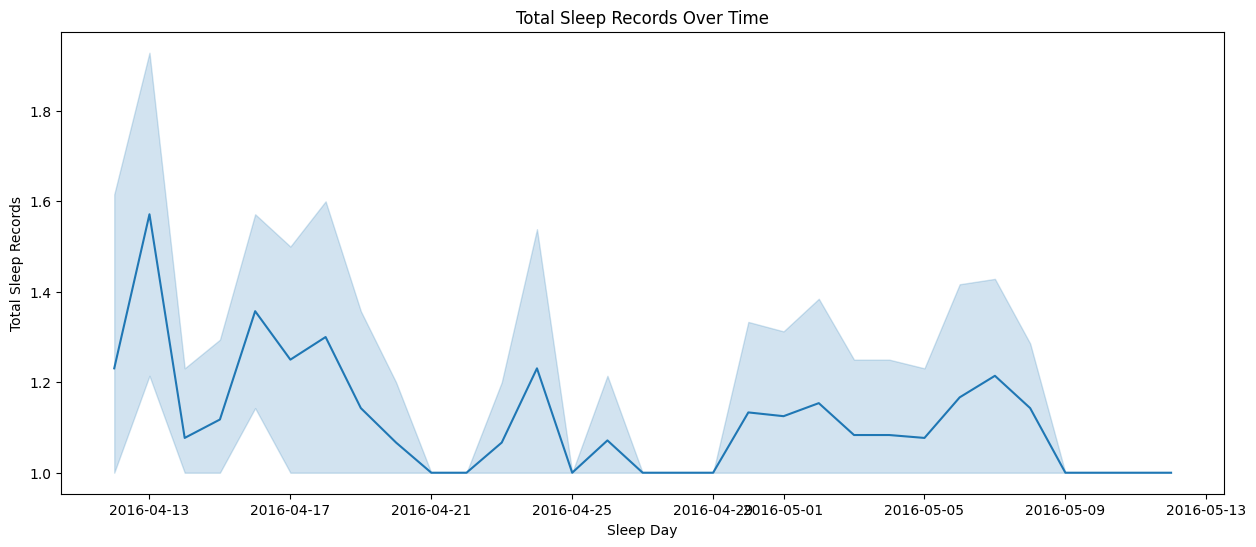

In [6]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='SleepDay', y='TotalSleepRecords', data=df_sleep_day)
plt.title('Total Sleep Records Over Time')
plt.xlabel('Sleep Day')
plt.ylabel('Total Sleep Records')
plt.show()


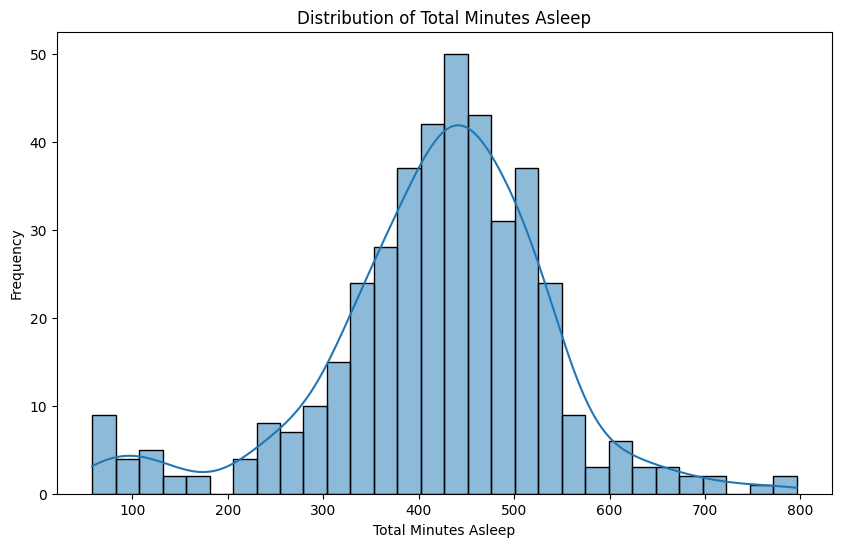

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df_sleep_day['TotalMinutesAsleep'], bins=30, kde=True)
plt.title('Distribution of Total Minutes Asleep')
plt.xlabel('Total Minutes Asleep')
plt.ylabel('Frequency')
plt.show()


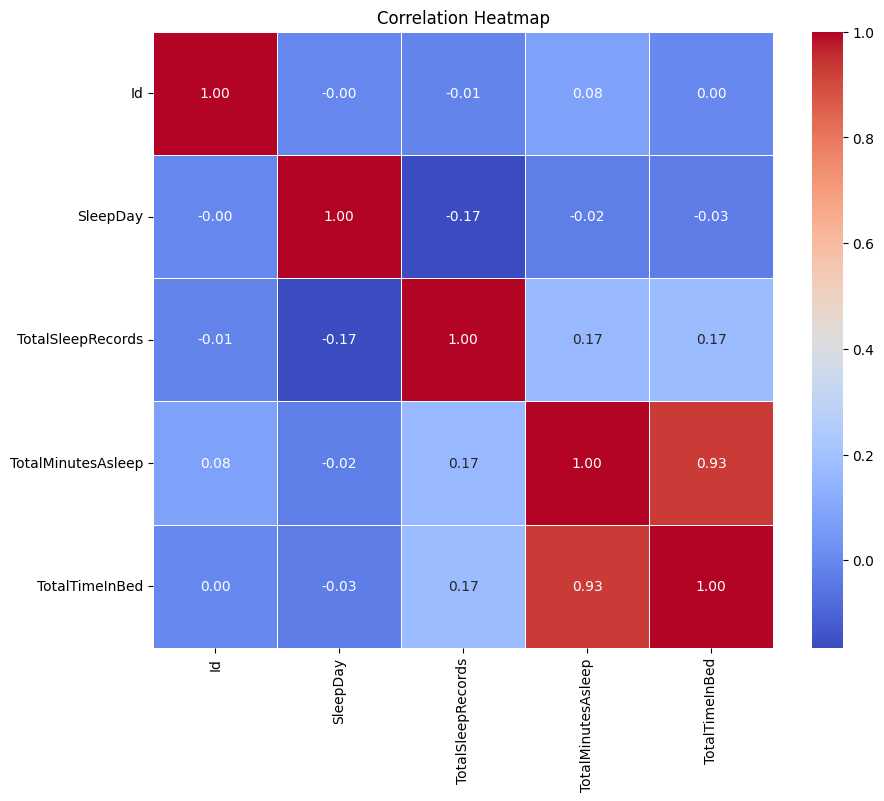

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_sleep_day.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


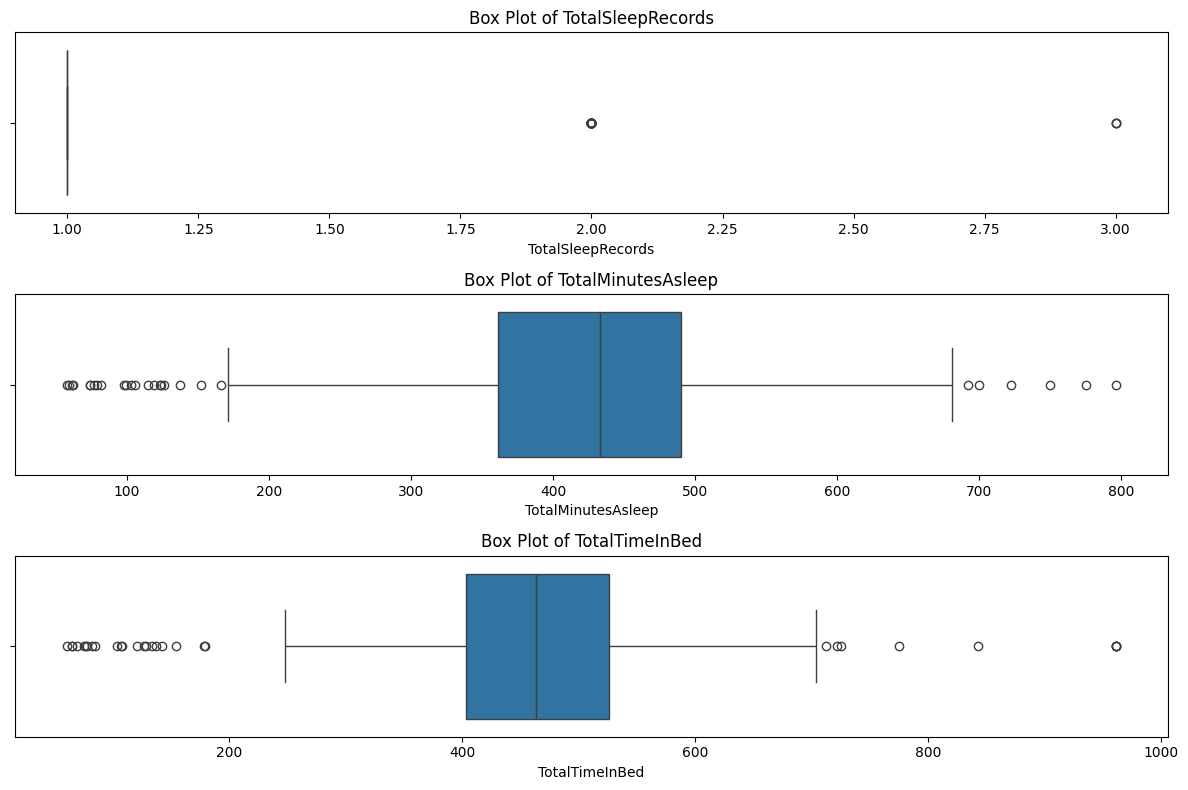

In [9]:
# Box plot for all columns
plt.figure(figsize=(12, 8))

# Box plot for 'TotalSleepRecords' column
plt.subplot(3, 1, 1)
sns.boxplot(x='TotalSleepRecords', data=df_sleep_day)
plt.title('Box Plot of TotalSleepRecords')
plt.xlabel('TotalSleepRecords')

# Box plot for 'TotalMinutesAsleep' column
plt.subplot(3, 1, 2)
sns.boxplot(x='TotalMinutesAsleep', data=df_sleep_day)
plt.title('Box Plot of TotalMinutesAsleep')
plt.xlabel('TotalMinutesAsleep')

# Box plot for 'TotalTimeInBed' column
plt.subplot(3, 1, 3)
sns.boxplot(x='TotalTimeInBed', data=df_sleep_day)
plt.title('Box Plot of TotalTimeInBed')
plt.xlabel('TotalTimeInBed')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


Removing Outliers

In [10]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return df_no_outliers, outliers

# Remove outliers for each column
df_sleep_day_no_outliers_records, outliers_records = remove_outliers_iqr(df_sleep_day, 'TotalSleepRecords')
df_sleep_day_no_outliers_minutes, outliers_minutes = remove_outliers_iqr(df_sleep_day, 'TotalMinutesAsleep')
df_sleep_day_no_outliers_time, outliers_time = remove_outliers_iqr(df_sleep_day, 'TotalTimeInBed')

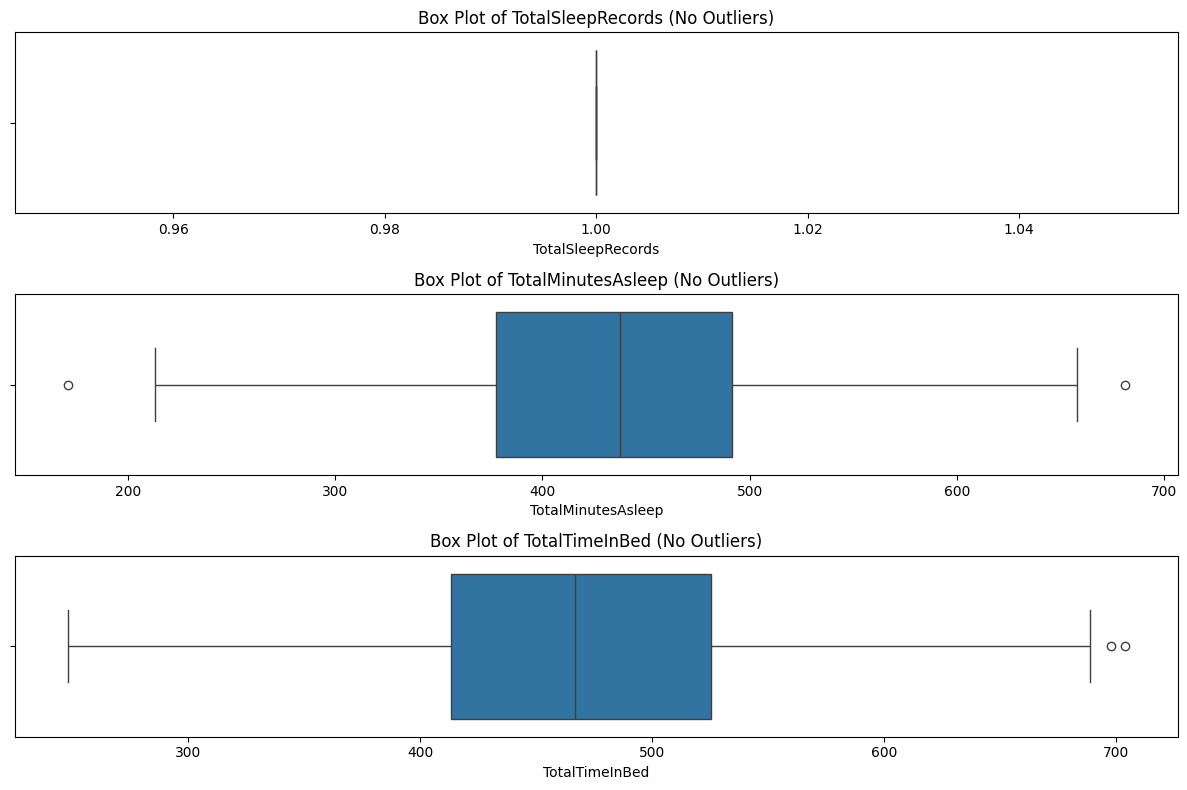

In [11]:
# Box plots without outliers
plt.figure(figsize=(12, 8))

# Box plot for 'TotalSleepRecords' column
plt.subplot(3, 1, 1)
sns.boxplot(x='TotalSleepRecords', data=df_sleep_day_no_outliers_records)
plt.title('Box Plot of TotalSleepRecords (No Outliers)')
plt.xlabel('TotalSleepRecords')

# Box plot for 'TotalMinutesAsleep' column
plt.subplot(3, 1, 2)
sns.boxplot(x='TotalMinutesAsleep', data=df_sleep_day_no_outliers_minutes)
plt.title('Box Plot of TotalMinutesAsleep (No Outliers)')
plt.xlabel('TotalMinutesAsleep')

# Box plot for 'TotalTimeInBed' column
plt.subplot(3, 1, 3)
sns.boxplot(x='TotalTimeInBed', data=df_sleep_day_no_outliers_time)
plt.title('Box Plot of TotalTimeInBed (No Outliers)')
plt.xlabel('TotalTimeInBed')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [13]:
df_filtered = pd.DataFrame({
    'TotalSleepRecords': df_sleep_day_no_outliers_records['TotalSleepRecords'],
    'TotalMinutesAsleep': df_sleep_day_no_outliers_minutes['TotalMinutesAsleep'],
    'TotalTimeInBed': df_sleep_day_no_outliers_time['TotalTimeInBed']
})

# df_minute_intensities_wide is our DataFrame with outliers removed

# Specifying the path to save the filtered dataset
filteredDatasetPath = '/University/6th Semester/Sixth Semester/IDS-AIProject/FilteredFitbaseData/sleepDay_merged_Filtered.csv'

# Saving the DataFrame to a CSV file
df_filtered.to_csv(filteredDatasetPath, index=False)

print(f"Filtered dataset saved to: {filteredDatasetPath}")

Filtered dataset saved to: /University/6th Semester/Sixth Semester/IDS-AIProject/FilteredFitbaseData/sleepDay_merged_Filtered.csv
